<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [80]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    5      5  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [81]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.8s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

In [82]:
# Expérimentations numériques à faire ici
include("../src/newton.jl")
fct1(x) =  2*(x[1]+x[2]+x[3]-3)^2 + (x[1]-x[2])^2 + (x[2]-x[3])^2
# la gradient de la fonction fct1
function grad_fct1(x)
    y1 = 4*(x[1]+x[2]+x[3]-3) + 2*(x[1]-x[2])
    y2 = 4*(x[1]+x[2]+x[3]-3) - 2*(x[1]-x[2]) +2*(x[2]-x[3])
    y3 = 4*(x[1]+x[2]+x[3]-3) - 2*(x[2]-x[3])
    return [y1;y2;y3]
end
# la hessienne de la fonction fct1
hess_fct1(x) = [6 2 4;2 8 2;4 2 6]

# Affichage les sorties de l'algorithme des Régions de confiance
function afficher_resultats(algo, nom_fct, x0, x_sol, f_sol, flag, nbiters, solution)
    println("-------------------------------------------------------------------------")
    printstyled("Résultats de : ",algo, " appliqué à ", nom_fct, ":\n", bold=true, color=:blue)
    println("  * x0       = ", x0)
    println("  * x_sol    = ", x_sol)
    println("  * f(x_sol) = ", f_sol)
    println("  * nb_iters = ", nbiters)
    println("  * flag     = ", flag)
    println("  * solution = ", solution)
end

# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

afficher_resultats (generic function with 1 method)

In [83]:
x0 = [1, 0, 0]
sol_exacte_fct1 = [1 1 1]
x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy")
afficher_resultats("RC avec cauchy", "f1", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)
x_sol, f_sol, flag, nb_iters, _ = newton(fct1, grad_fct1, hess_fct1, x0)
afficher_resultats("newton", "f1", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct1)


-------------------------------------------------------------------------
Résultats de : RC avec cauchy appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000065049853921, 1.000000873235793, 0.9999952414861938]
  * f(x_sol) = 7.71589405988668e-11
  * nb_iters = 33
  * flag     = 2
  * solution = [1 1 1]
-------------------------------------------------------------------------
Résultats de : newton appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0, 1.0, 0.9999999999999999]
  * f(x_sol) = 1.232595164407831e-32
  * nb_iters = 1
  * flag     = 0
  * solution = [1 1 1]


#### Q1
La fonction $f_{1}$ est exactement égale à son développement de Taylor à l’ordre 2. 


Dans l'algorithme de Newton, on a trouvé la solution en une seule itération , ici avec rc cauchy on a fait 33 itérations pour y arriver, aussi avec newton $x_{sol}$ est plus exacte (plus proche de la solution exacte) que celle de l'algo de regions de confience avec cauchy.

**Conclusion :** L'algorithme de newton est plus performant que celui de rc avec cauchy sur les formes quadratiques.

In [84]:
using Plots
# importer le package si vous ne l'avez pas


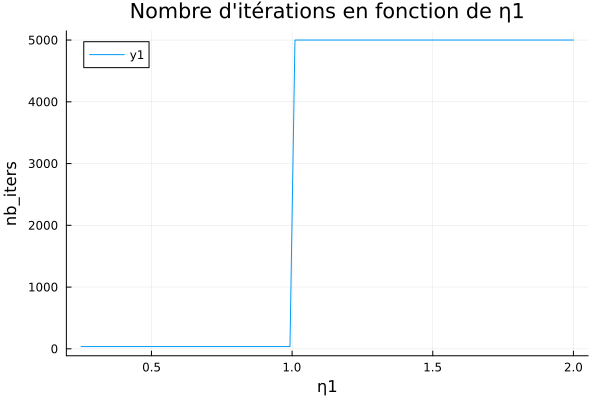

In [85]:
# influence de η1
x0 = [1, 100, 200]
iterations = []
for η1 in range(0.25,2,100)
   xmin,f_min,flag,nb_iters = regions_de_confiance(fct1,grad_fct1,hess_fct1,x0,η1=η1,algo_pas="cauchy")
   iterations =vcat(iterations,nb_iters)   
end
plot(range(0.25,2,100),iterations,xlabel=("η1"),ylabel=("nb_iters"),title="Nombre d'itérations en fonction de η1")

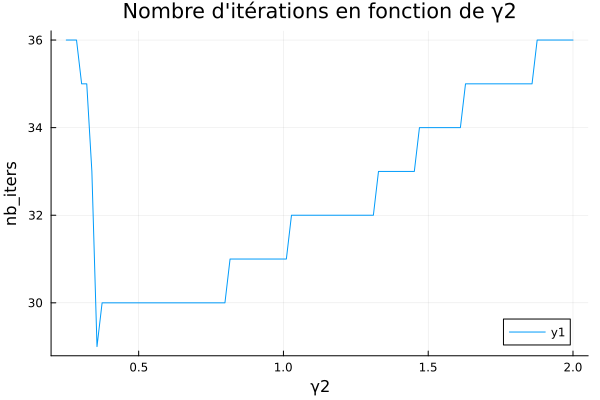

In [86]:
# influence de γ2
iterations = []
for γ2 in range(2,5,100)
   xmin,f_min,flag,nb_iters = regions_de_confiance(fct1,grad_fct1,hess_fct1,x0,γ2=γ2,algo_pas="cauchy")
   iterations =vcat(iterations,nb_iters)   
end
plot(range(0.25,2,100),iterations,xlabel=("γ2"),ylabel=("nb_iters"),title="Nombre d'itérations en fonction de γ2")

#### Q2
Les deux courbes ci-dessus , traitent l'influence des paramètres η1 et γ2 sur le nombre d'itérations.


# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [87]:
include("../src/gct.jl")
include("../test/tester_gct.jl")


tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [88]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = true # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : true

-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [1, 0, 0]
  * x_sol    = [1.0000000000000007, 1.0, 1.0]
  * f(x_sol) = 2.0214560696288428e-30
  * nb_iters = 1
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f1:
  * x0       = [10.0, 3.0, -2.2]
  * x_sol    = [0.9999999999999996, 1.0000000000000002, 1.0000000000000004]
  * f(x_sol) = 4.930380657631324e-31
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1, 1]
-------------------------------------------------------------------------
Résultats de : RC et gct appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9999996743780089, 0.9999993478371609]
  * f(x_sol) = 1.0611413038132374e-13
  * nb_iters = 31
  * flag     = 0
  * solution = [1, 1]
-----------------------------------------------------------

## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [ ]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

In [89]:
x0 = [-1 , -1, 0]
sol_exacte_fct1 = [1, 1, 1]
cauchy1 = []
gct1 = []
x_sol, f_sol, flag, nb_iters, xs1 = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy")
afficher_resultats("RC avec cauchy", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
for element in xs1
    cauchy1 = vcat(cauchy1, [norm(element - sol_exacte_fct1)])
end
println("Difference en norme entre les iteres et la soluton exacte pour cauchy:\n")
println(cauchy1[1:10])
x_sol, f_sol, flag, nb_iters, xs2 = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, max_iter_gct = 1, algo_pas="gct")
afficher_resultats("RC avec gct d'une seule iter", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
for element in xs2
    gct1 = vcat(gct1, [norm(element - sol_exacte_fct1)])
end
println("Difference en norme entre les iteres et la solution exacte pour gct avec max_iter_gct = 1:\n")
println(gct1[1:end])



-------------------------------------------------------------------------
Résultats de : RC avec cauchy appliqué à f2:
  * x0       = [-1, -1, 0]
  * x_sol    = [0.9999958910170591, 1.0000007085287874, 1.0000055260405156]
  * f(x_sol) = 5.545307326879748e-11
  * nb_iters = 34
  * flag     = 2
  * solution = [1, 1]
Difference en norme entre les iteres et la soluton exacte pour cauchy:

Any[3.0, 1.1229955974855403, 0.5356831631023935, 0.2573929917938327, 0.17534582548739502, 0.12719664451237517, 0.08909059590629453, 0.06469824824081094, 0.04532014044386441, 0.03291186451594372]
-------------------------------------------------------------------------
Résultats de : RC avec gct d'une seule iter appliqué à f2:
  * x0       = [-1, -1, 0]
  * x_sol    = [0.9999994189548166, 1.0000002257974707, 1.0000003406068783]
  * f(x_sol) = 6.646049766465934e-13
  * nb_iters = 8
  * flag     = 2
  * solution = [1, 1]
Difference en norme entre les iteres et la solution exacte pour gct avec max_iter_gct = 

On remarque qu'avec le max_iter_gct = 1 , la difference en norme entre la solution exacte et de chaque iteré pour l'algo de gct est plus grande que celle avec l'algo de cauchy.

In [90]:
x0 = [10 , 0, 0]
sol_exacte_fct1 = [1, 1, 1]
cauchy1 = []
gct1 = []
x_sol, f_sol, flag, nb_iters, xs1 = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy")
afficher_resultats("RC avec cauchy", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
for element in xs1
    cauchy1 = vcat(cauchy1, [norm(element - sol_exacte_fct1)])
end
println("Difference en norme entre les iteres et la soluton exacte pour cauchy:\n")
println(cauchy1[1:10])
x_sol, f_sol, flag, nb_iters, xs2 = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0,  algo_pas="gct")
afficher_resultats("RC avec gct d'une seule iter", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
for element in xs2
    gct1 = vcat(gct1, [norm(element - sol_exacte_fct1)])
end
println("Difference en norme entre les iteres et la solution exacte pour ce cas de gct:\n")
println(gct1[1:end])



-------------------------------------------------------------------------
Résultats de : RC avec cauchy appliqué à f2:
  * x0       = [10, 0, 0]
  * x_sol    = [1.0000063899153657, 1.000000876663062, 0.999995363410758]
  * f(x_sol) = 7.462558816878778e-11
  * nb_iters = 41
  * flag     = 2
  * solution = [1, 1]
Difference en norme entre les iteres et la soluton exacte pour cauchy:

Any[9.1104335791443, 7.667213848901554, 5.2852815253458525, 3.557042519615475, 2.61912744562629, 1.7932450811479788, 1.320471578162052, 0.9040981019119044, 0.6657404927147906, 0.4558180025256151]
-------------------------------------------------------------------------
Résultats de : RC avec gct d'une seule iter appliqué à f2:
  * x0       = [10, 0, 0]
  * x_sol    = [0.9999999999999996, 0.9999999999999996, 1.0000000000000009]
  * f(x_sol) = 1.7749370367472766e-30
  * nb_iters = 3
  * flag     = 0
  * solution = [1, 1]
Difference en norme entre les iteres et la solution exacte pour ce cas de gct:

Any[9.1104

##### On remarque que pour le cas max_iter_gct=1 on aura un nombre d'iterations plus grand que dans le cas où max_iter_gct est quelconque.

### Cauchy :
Lent que gct 


### gct :
Rapide que cauchy mais plus complexe.